<a href="https://colab.research.google.com/github/bonareri/Credit-Risk-Assessment/blob/main/Credit_Risk_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT RISK MODELLING

## Importing Libraries



In [68]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures

# Class Imbalance
from imblearn.over_sampling import SMOTE

# CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

warnings.filterwarnings(action="ignore")
%matplotlib inline
import requests

## Loading Data

In [47]:
# Loading Data
df = pd.read_csv('/content/Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [49]:
#delete ID
df = df.drop('LoanID', axis=1)

In [24]:
# Drop rows with missing values in 'Default' or 'HasCoSigner'
# df = df.dropna(subset=['Default', 'HasCoSigner'])

In [50]:
# check null values
df.isnull().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education,0


## Exploratory Data Analysis (EDA)

In [51]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


### Default Distibution

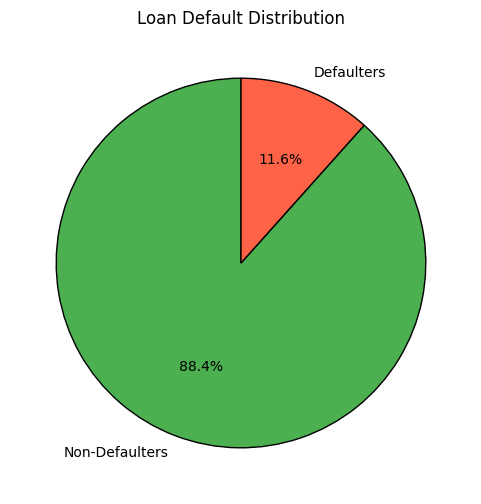

In [52]:
# Count the number of defaulters and non-defaulters
default_counts = df['Default'].value_counts()

# Define labels
labels = ['Non-Defaulters', 'Defaulters']

# Define colors
colors = ['#4CAF50', '#FF6347']  # Green for non-defaulters, red for defaulters

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(default_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Loan Default Distribution")
plt.show()

### Univariate Analysis (Distribution of Each Feature)

#### Numerical Features

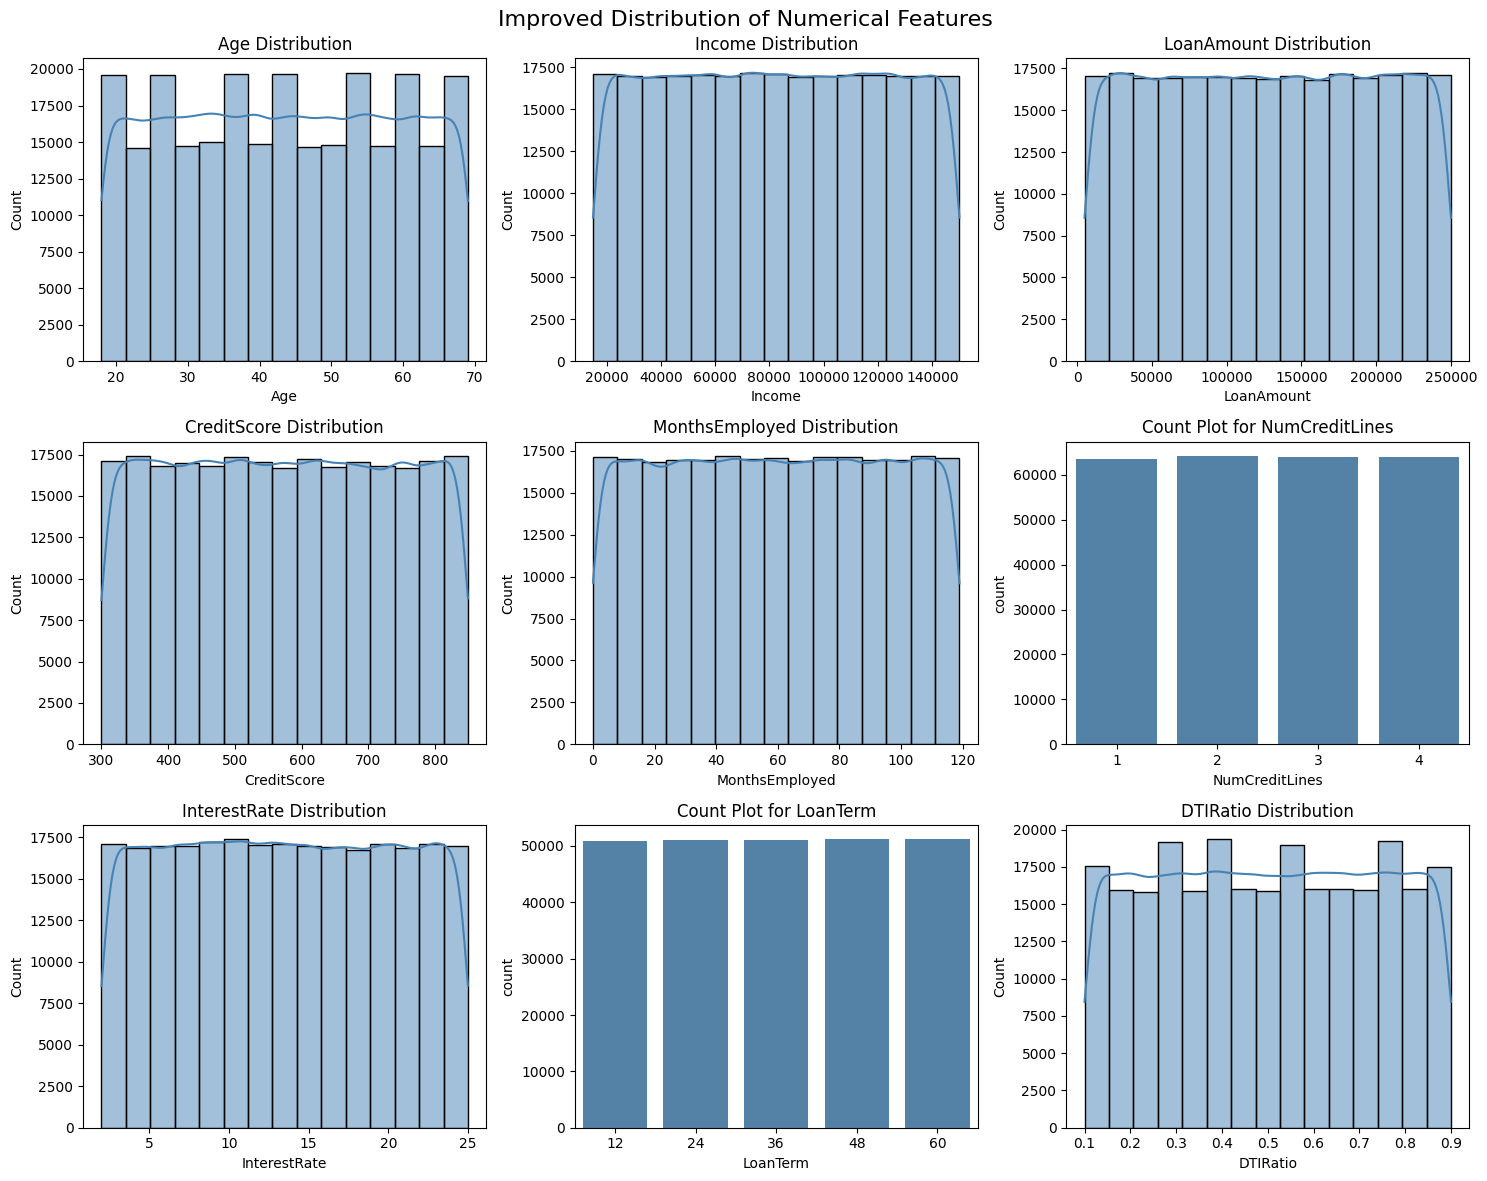

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for idx, col in enumerate(num_cols):
    ax = axes[idx//3, idx%3]

    # Check if the column has discrete values
    if df[col].nunique() < 15:
        sns.countplot(x=df[col], ax=ax, color='#4682B4')
        ax.set_title(f'Count Plot for {col}')
    else:
        sns.histplot(df[col], bins=15, kde=True, color='#4682B4', ax=ax)
        ax.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

### KDE Plots

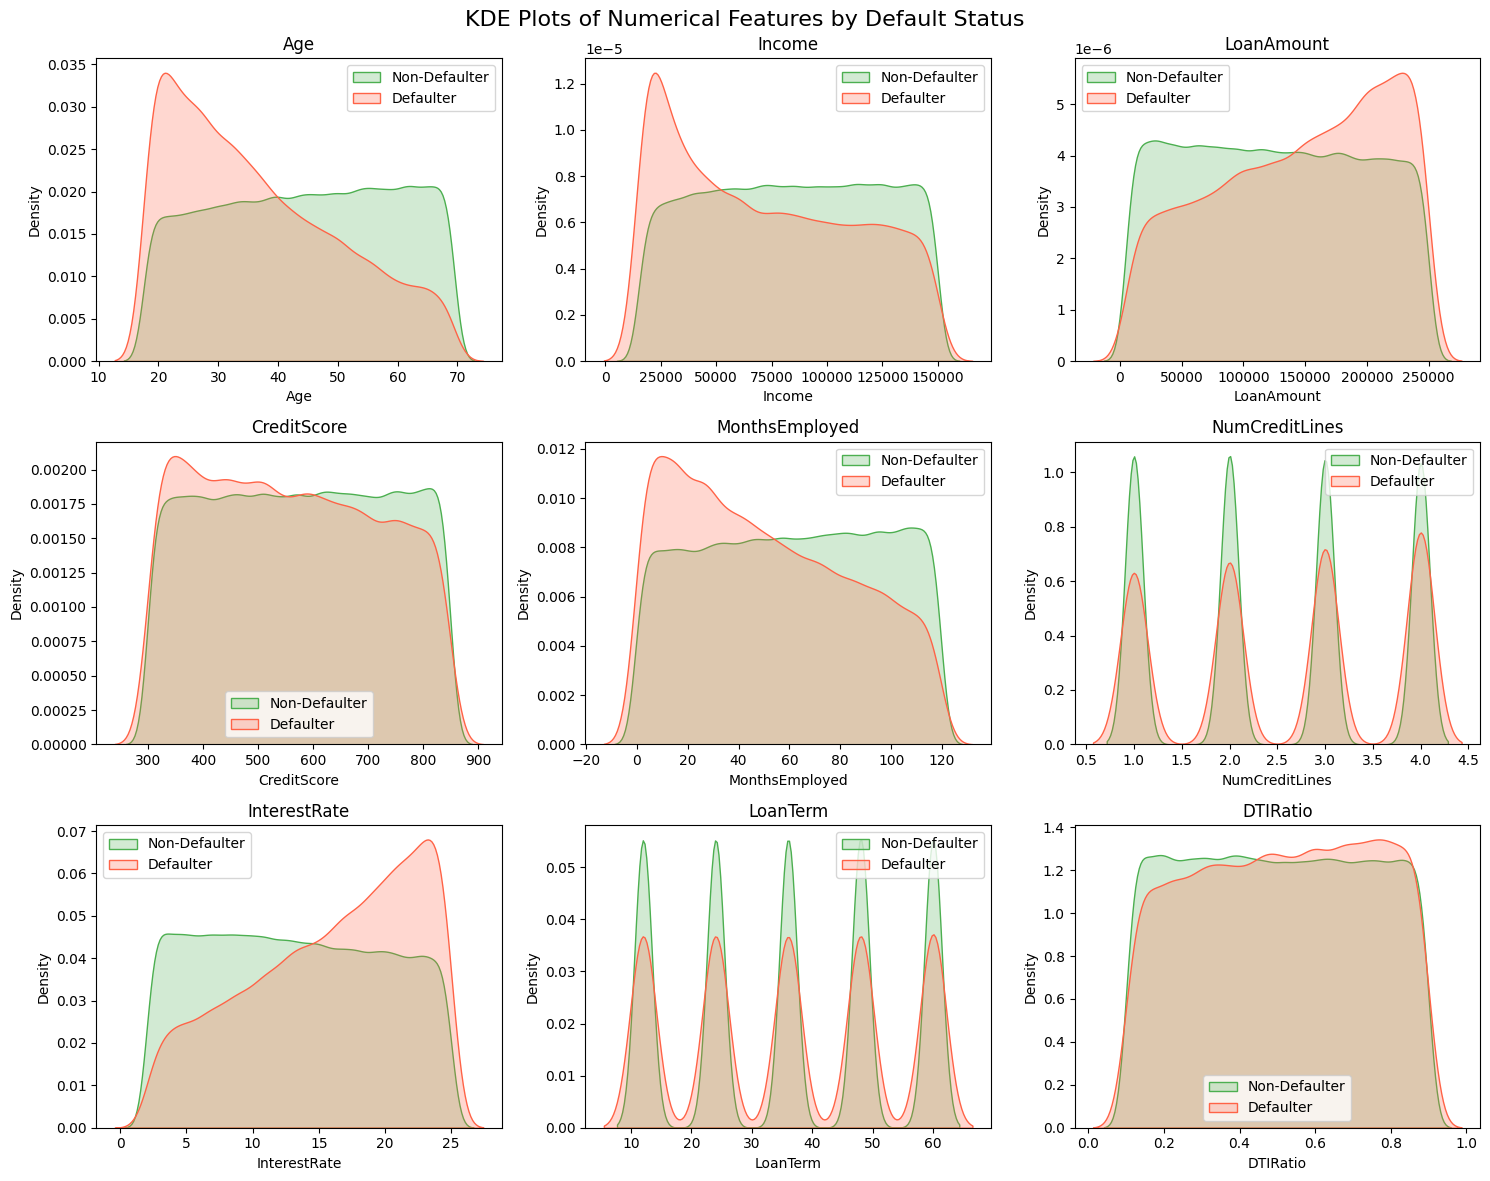

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('KDE Plots of Numerical Features by Default Status', fontsize=16)

for idx, col in enumerate(num_cols):
    ax = axes[idx//3, idx%3]
    sns.kdeplot(df[df['Default'] == 0][col], shade=True, color='#4CAF50', label='Non-Defaulter', ax=ax)
    sns.kdeplot(df[df['Default'] == 1][col], shade=True, color='#FF6347', label='Defaulter', ax=ax)
    ax.set_title(col)
    ax.legend()

plt.tight_layout()
plt.show()

### Key Insights from KDE Plots

#### 1. Age
- Younger borrowers (20-30) have a higher tendency to default.
- Non-defaulters are spread across all age groups.

#### 2. Income
- Defaulters tend to have lower incomes.
- Non-defaulters have a more even income distribution.

#### 3. Loan Amount
- Larger loan amounts are associated with higher default rates.

#### 4. Credit Score
- Defaulters typically have lower credit scores.
- Non-defaulters have higher credit scores (above 700).

#### 5. Months Employed
- Defaulters have shorter employment durations.
- Longer employment duration correlates with non-defaulting.

#### 6. Number of Credit Lines
- Distribution is similar between groups.
- There are clear peaks in credit line counts.

#### 7. Interest Rate
- Defaulters are associated with higher interest rates.
- Non-defaulters tend to have lower interest rates.

#### 8. Loan Term
- Loan terms appear fixed at specific intervals.
- Non-defaulters have a slightly higher density in shorter loan terms.

#### 9. Debt-to-Income (DTI) Ratio
- Defaulters have a slightly higher DTI ratio, indicating financial strain.


### Correlation Analysis

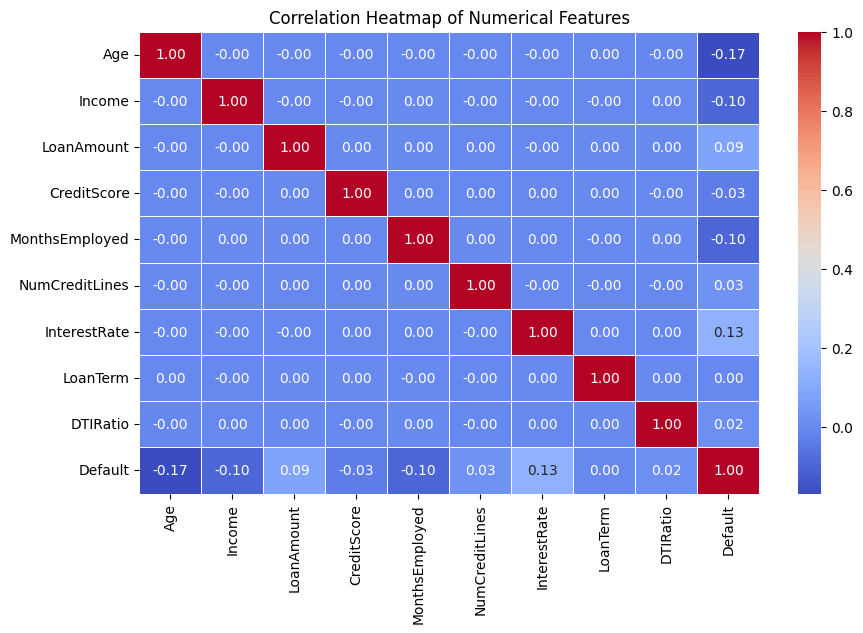

In [ ]:
# Select only numerical features
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set title
plt.title("Correlation Heatmap of Numerical Features")

# Show plot
plt.show()

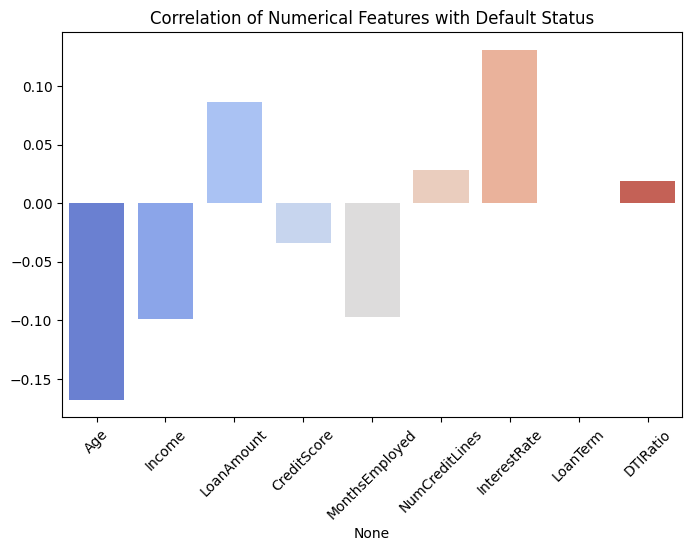

In [ ]:
# Select only numerical features
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with 'Default' column
corr_with_default = numeric_df.corr()['Default'].drop('Default')

# Plot correlations
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_default.index, y=corr_with_default.values, palette="coolwarm")

# Rotate x labels for better visibility
plt.xticks(rotation=45)

# Add title
plt.title("Correlation of Numerical Features with Default Status")

# Show plot
plt.show()

In [ ]:
# Select only numerical features
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with 'Default' column
corr_with_default = numeric_df.corr()['Default'].sort_values(ascending=False)

# Display the correlation values
print(corr_with_default)

Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
CreditScore      -0.034166
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
Name: Default, dtype: float64


#### Boxplots to detect outliers:

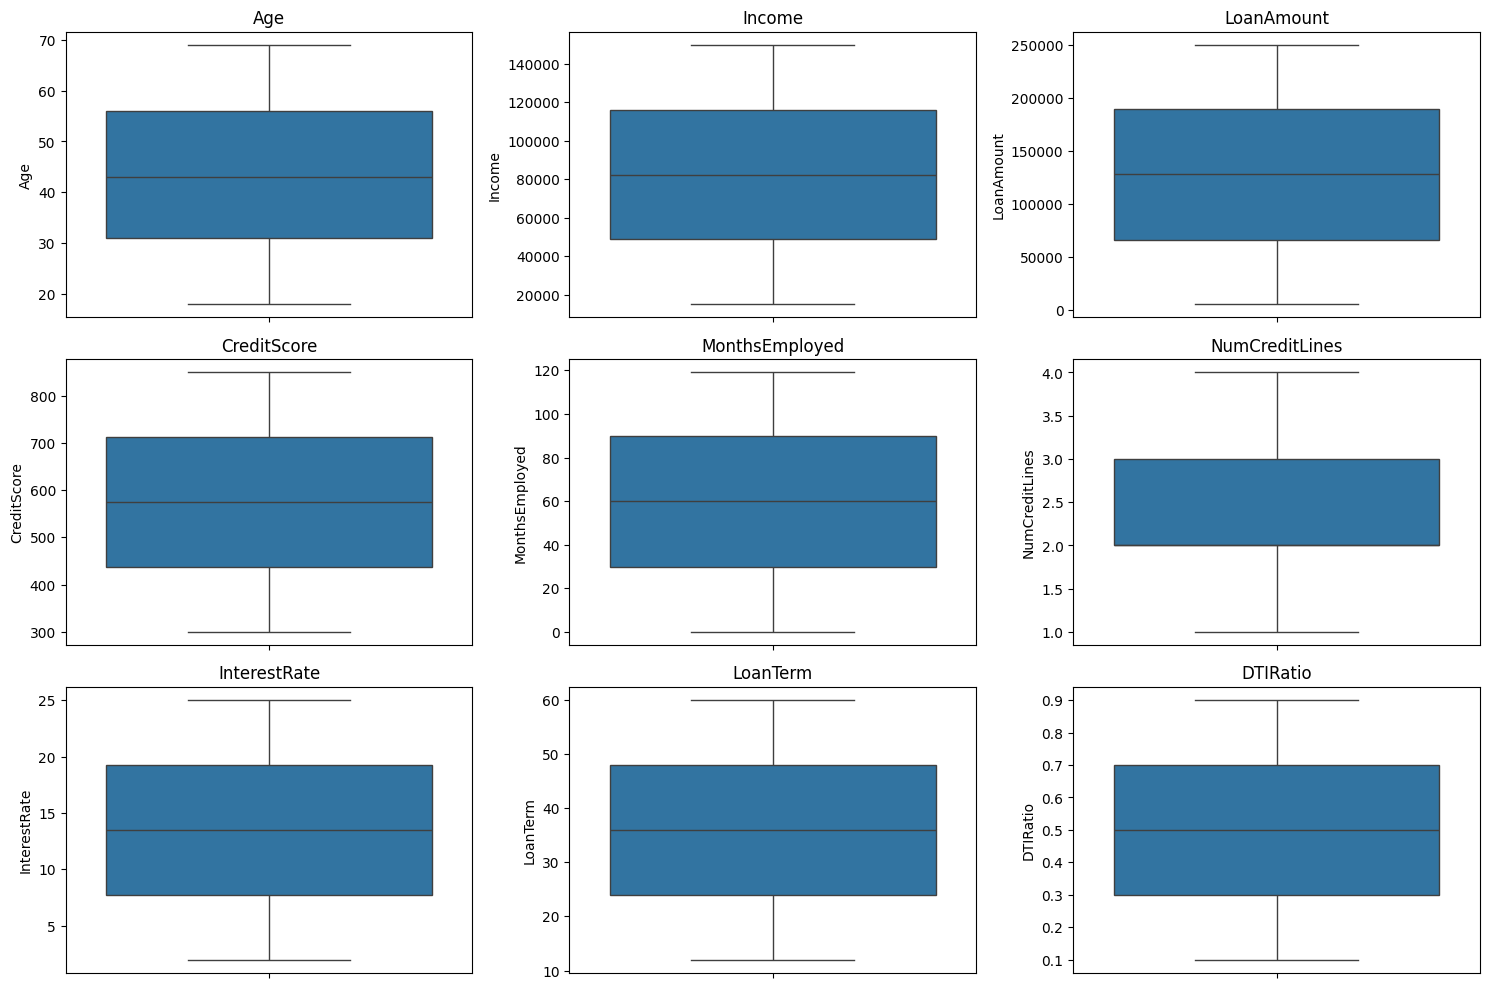

In [ ]:
# Select only numerical columns
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

# Plot boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Bivariate Analysis (Relationships Between Features)

#### Income and Loan Default

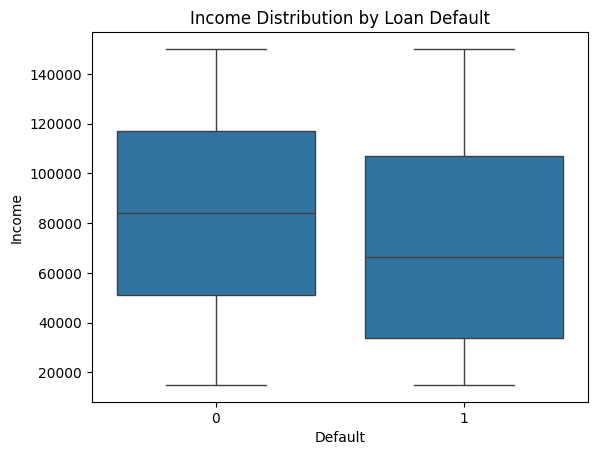

In [ ]:
sns.boxplot(x='Default', y='Income', data=df)
plt.title("Income Distribution by Loan Default")
plt.show()

**Insight:**
 - Borrowers with lower income levels tend to have higher default rates.
 - Borrowers earning less than 50K are more likely to default compared to those earning above 100K.

#### Loan Amount vs. Default Rate

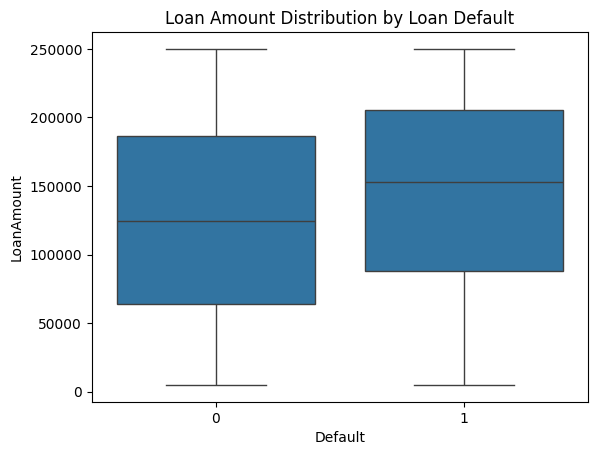

In [ ]:
sns.boxplot(x='Default', y='LoanAmount', data=df)
plt.title("Loan Amount Distribution by Loan Default")
plt.show()

**Insights**
- Higher loan amounts increase the likelihood of default.
- Borrowers taking loans above 180K are at a greater risk of default.

#### Credit Score and Loan Default

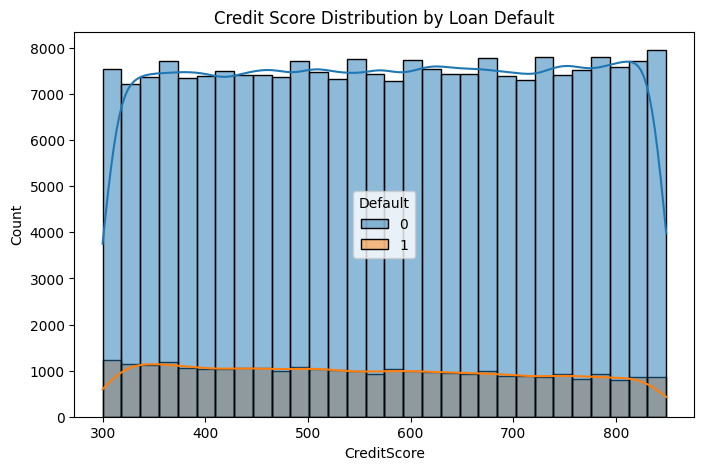

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="CreditScore", hue="Default", bins=30, kde=True)
plt.title("Credit Score Distribution by Loan Default")
plt.show()

**Insights**
- Lower credit scores are associated with higher default rates.
- Borrowers with credit scores below 500 have a significantly higher default rate.

#### Debt-to-Income Ratio (DTI) and Default Rate

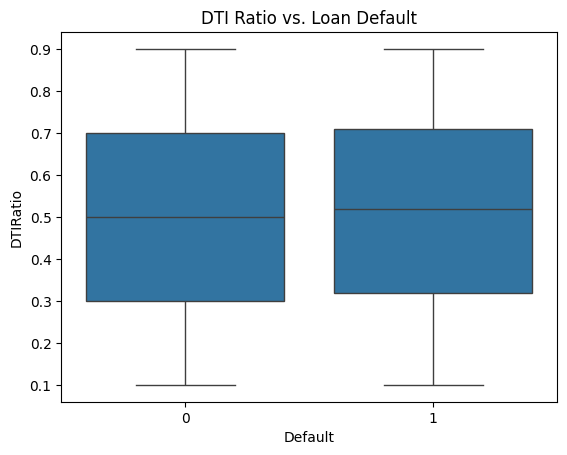

In [ ]:
sns.boxplot(x='Default', y='DTIRatio', data=df)
plt.title("DTI Ratio vs. Loan Default")
plt.show()

**Insights**
- Higher DTI ratios correlate with increased default risk.
- Borrowers with a DTI ratio > 0.7 are more likely to default.

#### Employment Type and Loan Default

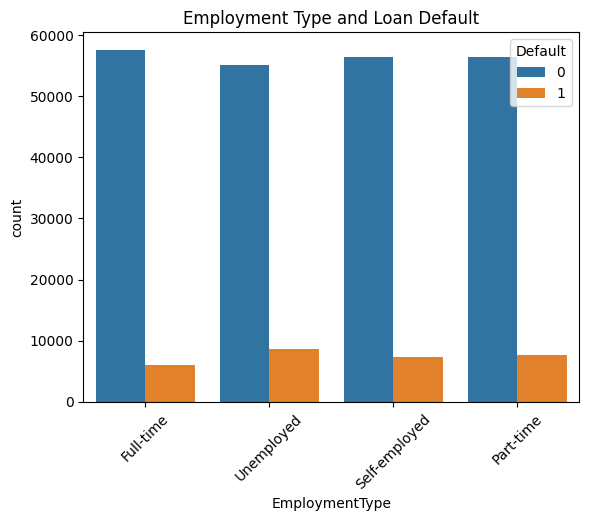

In [ ]:
sns.countplot(x='EmploymentType', hue='Default', data=df)
plt.xticks(rotation=45)
plt.title("Employment Type and Loan Default")
plt.show()

**Insights**
- Unemployed borrowers have a higher default rate than salaried employees. - Full-time employees are at a lower risk of default.

## Data Preprocessing

###  Encoding Categorical Variables

In [15]:
# Display categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

# View unique values in each categorical column
for col in categorical_cols:
    print(f"\n{col} Unique Values:\n", df[col].unique())

Categorical Columns: Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

Education Unique Values:
 ["Bachelor's" "Master's" 'High School' 'PhD']

EmploymentType Unique Values:
 ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']

MaritalStatus Unique Values:
 ['Divorced' 'Married' 'Single']

HasMortgage Unique Values:
 ['Yes' 'No']

HasDependents Unique Values:
 ['Yes' 'No']

LoanPurpose Unique Values:
 ['Other' 'Auto' 'Business' 'Home' 'Education']

HasCoSigner Unique Values:
 ['Yes' 'No']


In [53]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Encode binary categorical columns using LabelEncoder
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode nominal categorical columns using OneHotEncoder
nominal_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)  # Drop first to avoid multicollinearity

# Check the transformed dataframe
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,False,False,False,False,False,False,False,False,False,True
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,False,False,False,False,True,False,False,False,False,True
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,False,False,False,True,False,False,False,False,False,False
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,False,False,False,False,True,False,True,False,False,False
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,False,False,False,True,False,False,False,False,False,False


In [54]:
# Convert boolean (True/False) values to 0 and 1
bool_cols = df.select_dtypes(include=['bool']).columns  # Identify boolean columns
df[bool_cols] = df[bool_cols].astype(int)

# Check the transformed dataframe
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,0,0,0,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,0,0,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,0,0,0,1,0,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,0,0,0,1,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,0,0,0,1,0,0,0,0,0,0


### Splitting Data into Train & Test Sets

In [55]:
X = df.drop(columns=['Default'])
y = df['Default']

# 1. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

### Feature Scaling:

In [56]:
# 2. Feature Scaling: Fit on training data and transform both training and test data

num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
            'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Handling Class Imbalance

Since only 11.6% of borrowers default, the dataset is imbalanced. This is  handled using oversampling.

SMOTE (Synthetic Minority Oversampling Technique)

In [57]:
# 3. Apply SMOTE on the scaled training data only
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Modelling

### Logistic Regression

In [58]:
# 4. Model Training: Train a classifier using the resampled data
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [59]:
# Predictions
y_pred = model.predict(X_test)

In [60]:
# Evaluate
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression
Accuracy: 0.8172508321911103
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     45139
           1       0.28      0.35      0.31      5931

    accuracy                           0.82     51070
   macro avg       0.59      0.62      0.60     51070
weighted avg       0.84      0.82      0.83     51070



###  Random Forest:

In [61]:
# Train a Random Forest classifier on the resampled training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [62]:
# Predict on the scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)

In [63]:
# Evaluate the model's performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8691012336009399
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     45139
           1       0.37      0.18      0.25      5931

    accuracy                           0.87     51070
   macro avg       0.64      0.57      0.59     51070
weighted avg       0.84      0.87      0.85     51070



###  Feature Importance

In [38]:
# Get feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

Age                             0.122325
NumCreditLines                  0.103188
InterestRate                    0.097854
LoanTerm                        0.088191
Income                          0.083743
MonthsEmployed                  0.080849
LoanAmount                      0.080211
CreditScore                     0.066562
DTIRatio                        0.063938
HasCoSigner                     0.031456
HasDependents                   0.029608
HasMortgage                     0.024963
MaritalStatus_Married           0.014375
MaritalStatus_Single            0.013150
EmploymentType_Unemployed       0.011470
Education_High School           0.010923
Education_PhD                   0.010123
EmploymentType_Part-time        0.010119
Education_Master's              0.010065
EmploymentType_Self-employed    0.009889
LoanPurpose_Business            0.009560
LoanPurpose_Education           0.009341
LoanPurpose_Other               0.009168
LoanPurpose_Home                0.008929
dtype: float64


### XGBoost

In [64]:
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [65]:
# Fit the model on the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [66]:
# Predict on the scaled test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [67]:
# Evaluate the performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8456040728411983
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     45139
           1       0.32      0.28      0.30      5931

    accuracy                           0.85     51070
   macro avg       0.61      0.60      0.61     51070
weighted avg       0.84      0.85      0.84     51070



### Hyperparameter Tuning:

In [69]:
# 1. Compute scale_pos_weight from the training distribution.
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos
print("Computed scale_pos_weight:", scale_pos_weight)

Computed scale_pos_weight: 7.61128909872692


In [77]:
# Define a subsample fraction for initial tuning (e.g., 10% of the training data)
sample_frac = 0.1
subset_indices = np.random.choice(X_train.index, size=int(len(X_train) * sample_frac), replace=False)
X_train_sub = X_train.loc[subset_indices]
y_train_sub = y_train.loc[subset_indices]

In [78]:
param_dist = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400],
    # Try values around the computed scale_pos_weight
    'scale_pos_weight': [computed_weight * 0.8, computed_weight, computed_weight * 1.2]
}

In [79]:
# Set up StratifiedKFold to preserve class proportions in each fold.
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [81]:
# Initialize the XGBoost classifier.
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [82]:
# Initialize RandomizedSearchCV using a reduced number of iterations for speed.
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # Fewer iterations for faster tuning on the subsample.
    scoring='f1',  # Using F1 score to balance precision and recall.
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [83]:
# Fit RandomizedSearchCV on the subsampled training data.
random_search.fit(X_train_sub, y_train_sub)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           imp...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400],
                                        'scale_pos_weight': [6.089031278981537,
                                                             7.61128909872692,
                                                             9.133546918472303]},
                   random_state=42, scoring='f1', verbose=1)

In [84]:
# Output the best hyperparameters and the best F1 score from the subsample.
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score on Subsampled Training Data:", random_search.best_score_)

Best Parameters: {'scale_pos_weight': 6.089031278981537, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01}
Best F1 Score on Subsampled Training Data: 0.3492168513751561


In [85]:
# Evaluate the best estimator on the full test set.
y_pred = random_search.best_estimator_.predict(X_test)
print("Test Set Evaluation:\n", classification_report(y_test, y_pred))

Test Set Evaluation:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85     45139
           1       0.26      0.56      0.35      5931

    accuracy                           0.76     51070
   macro avg       0.59      0.67      0.60     51070
weighted avg       0.85      0.76      0.79     51070



In [86]:
# Best parameters obtained from the subsampled tuning:
best_params = {
    'scale_pos_weight': 6.089031278981537,
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate': 0.01
}

In [87]:
# Initialize the final XGBoost model with the best parameters.
final_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    **best_params
)

In [88]:
# Train the final model on the full training data.
final_model.fit(X_train, y_train)

# Predict on the test set.
y_pred = final_model.predict(X_test)

In [90]:
# Evaluate the final model on the test set.
print("Tuned XGBoost Model Test Set Evaluation:\n", classification_report(y_test, y_pred))

Tuned XGBoost Model Test Set Evaluation:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85     45139
           1       0.26      0.58      0.36      5931

    accuracy                           0.76     51070
   macro avg       0.60      0.68      0.60     51070
weighted avg       0.86      0.76      0.79     51070

